# Causal Inference
## Задание CI.3


**Правила:**

* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Выполненную работу нужно отправить телеграм-боту `@miptstats_ds24_bot`. Для начала работы с ботом каждый раз отправляйте `/start`. **Работы, присланные иным способом, не принимаются.**
* Дедлайны см. в боте. После дедлайна работы не принимаются кроме случаев наличия уважительной причины.
* Прислать нужно **ноутбук в формате `ipynb`**.
* Следите за размером файлов. **Бот не может принимать файлы весом более 20 Мб.** Если файл получается больше, заранее разделите его на несколько.
* Выполнять задание необходимо полностью самостоятельно. **При обнаружении списывания все участники списывания будут сдавать устный зачет.**
* Решения, размещенные на каких-либо интернет-ресурсах, не принимаются. Кроме того, публикация решения в открытом доступе может быть приравнена к предоставлении возможности списать.
* Для выполнения задания используйте этот ноутбук в качестве основы, ничего не удаляя из него. Можно добавлять необходимое количество ячеек.
* Комментарии к решению пишите в markdown-ячейках.
* Выполнение задания (ход решения, выводы и пр.) должно быть осуществлено на русском языке.
* Если код будет не понятен проверяющему, оценка может быть снижена.
* Никакой код из данного задания при проверке запускаться не будет. *Если код студента не выполнен, недописан и т.д., то он не оценивается.*
* В каждой задаче не забывайте делать **пояснения и выводы**.

**Правила оформления теоретических задач:**

* Решения необходимо прислать одним из следующих способов:
  * фотографией в правильной ориентации, где все четко видно, а почерк разборчив,
    * отправив ее как файл боту вместе с ноутбуком *или*
    * вставив ее в ноутбук посредством `Edit -> Insert Image` (<font color="red">фото, вставленные ссылкой, не принимаются</font>);
  * в виде $\LaTeX$ в markdown-ячейках.
* Решения не проверяются, если какое-то требование не выполнено. Особенно внимательно все проверьте в случае выбора второго пункта (вставки фото в ноутбук). <font color="red"><b>Неправильно вставленные фотографии могут не передаться при отправке.</b></font> Для проверки попробуйте переместить `ipynb` в другую папку и открыть его там.
* В решениях поясняйте, чем вы пользуетесь, хотя бы кратко. Например, если пользуетесь независимостью, то достаточно подписи вида "*X и Y незав.*"
* Решение, в котором есть только ответ, и отсутствуют вычисления, оценивается в 0 баллов.

---


**Баллы за задание:**

* Задача 1 — 60 баллов
* Задача 2 — 120 баллов


<b><font size="5">Дорешка:</font></b>

* <b><font size="4">Задача 1</font></b>
  * <b><font color="#00b565" size="3">Исправил код</font></b>

* <b><font size="4">Задача 2</font></b>
  * <b><font color="#00b565" size="3">Исправил код</font></b>

*Примечание*
* <b><font color="#00b565">#00b565 &mdash; цвет для исправления замечаний</font></b>
* <b><font color="#f09000">#f09000 &mdash; цвет для решений с нуля</font></b>
* проверяющий может иначе классифицировать эти два типа дорешек

In [1]:
# Bot check

# HW_ID: ds_ci3
# Бот проверит этот ID и предупредит, если случайно сдать что-то не то.

# Status: final
# Перед отправкой в финальном решении удали "not" в строчке выше.
# Так бот проверит, что ты отправляешь финальную версию, а не промежуточную.
# Никакие значения в этой ячейке не влияют на факт сдачи работы.

In [3]:
import numpy as np
np.random.seed(42)
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(font_scale=1.3, palette="Set2", style="whitegrid")
from sklearn.linear_model import LogisticRegression, LinearRegression
from dowhy import CausalModel
import scipy.stats as sps
import econml

---
### Задача 1.

Рассмотрим оценку с двойной надежностью (DRE, doubly robust estimation). Как мы знаем, для состоятельности оценки достаточно состоятельности оценки propensity score или оценок контрафактивных исходов. Тем не менее, мы не знаем, насколько DRE устойчива в случае если обе составляющие допускают небольшое смещение. Проверим это.

Сгенерируйте искусственные данные с тритментом, таргетом и несколькими конфаундерами, причем эффект должен быть ненулевым, так мы будем знать истинное значение эффекта. Для генерации можно взять функцию из ноутбука по валидации с CI.

<b><font color="#00b565" size="5">Исправил код</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> <i>  
▫️ Наличие решения. (60.0)  
▫️ Количество итераций Монте-Карло менее 10_000. Комм. Для надежных результатов стоит производить достаточно много итераций. В данном случае вычисления не сильно долгие. (-5.0)  
▫️ Инд. комм. нет MAPE, ДИ графиков, ps (-35.0)  
Баллы: 20.0 / 60.0</i>  

In [4]:
def generate_data(effect=0, sample_size=1000, n_confounders=1, n_instruments=0, n_covariates=1, w_t_coefs=None, w_y_coefs=None, z_t_coefs=None, x_y_coefs=None):
    """
    Функция, генерирующая датасет размера size с таргетом, тритментом, конфаундерами, инструментами и ковариатами. Параметры
    effect: float. Истинный эффект, т. е. коэффициент влияния тритмента на таргет
    sample_size: int. Количество генерируемых величин
    n_confounders: int. Количество генерируемых конфаундеров (W -> T, W -> Y)
    n_instruments: int. Количество генерируемых инструментов (Z -> T)
    n_covariates: int. Количество генерируемых ковариат (X -> Y)
    w_t_coefs: float/None. Массив коэффициентов влияния конфаундеров на тритмент
    w_y_coefs: float/None. Массив коэффициентов влияния конфаундеров на таргет
    z_t_coefs: float/None. Массив коэффициентов влияния инструментов на тритмент
    x_y_coefs: float/None. Массив коэффициентов влияния ковариат на таргет
    Возвращает: data: pd.DataFrame(2 + n_confounders + n_instruments + n_covariates, sample_size).
    Датафрейм со сгенерированными данными. Таргет обозначается: y, тритмент: T, конфаундеры: W_i, инструменты: Z_i, ковариаты: X_i
    """
    if n_confounders > 0:  # генерируем смещение величин и ставим их влияние на таргет и тритмент
        locs_w = np.random.uniform(low=-1, high=1, size=n_confounders)  # генерируем смещение конфаундеров
        if w_t_coefs is None:  # ставим по дефолту влияние конфаундера 0.01 на параметр p тритмента
            w_t_coefs = np.full((n_confounders), 0.01)
        if w_y_coefs is None:  # ставим по дефолту влияние конфаундера 1 на параметр loc таргета
            w_y_coefs = np.full((n_confounders), 1.0)
    if n_instruments > 0:
        locs_z = np.random.uniform(low=-1, high=1, size=n_instruments)  # генерируем смещение инструментов
        if z_t_coefs is None:  # ставим по дефолту влияние инструмента 0.01 на параметр p тритмента
            z_t_coefs = np.full((n_instruments), 0.01)
    if n_covariates > 0:
        locs_x = np.random.uniform(low=-1, high=1, size=n_covariates)  # генерируем смещение ковариат
        if x_y_coefs is None:  # ставим по дефолту влияние ковариат 1 на параметр loc таргета
            x_y_coefs = np.full((n_covariates), 1.0)

    target = ["y"]  # таргет
    treatment = ["T"]  # тритмент
    confounders = [f"W_{i}" for i in range(n_confounders)]  # конфаундеры
    instruments = [f"Z_{i}" for i in range(n_instruments)]  # инструменты
    covariates = [f"X_{i}" for i in range(n_covariates)]  # ковариаты
    columns = target + treatment + confounders + instruments + covariates
    data = pd.DataFrame(index=np.arange(sample_size), columns=columns)

    # генерируем конфаундеры, инструменты и ковариаты. считаем смещение тритмента и таргета засчет остальных величин
    p_bias, loc_bias = 0, 0
    for i in range(n_confounders):
        w = np.random.normal(loc=locs_w[i], size=sample_size)  # генерируем конфаундер
        data[f"W_{i}"] = w  # записываем конфаундер в датафрейм
        p_bias += w_t_coefs[i] * w  # считаем смещение тритмента от конфаундера
        loc_bias += w_y_coefs[i] * w  # считаем смещение таргета от конфаундера
    for i in range(n_instruments):
        z = np.random.normal(loc=locs_z[i], size=sample_size) # генерируем инструмент
        data[f"W_{i}"] = z  # записываем инструмент в датафрейм
        p_bias += z_t_coefs[i] * z  # считаем смещение тритмента от инструмента
    for i in range(n_covariates):
        x = np.random.normal(loc=locs_x[i], size=sample_size)  # генерируем ковариату
        data[f"X_{i}"] = x  # записываем ковариату в датафрейм
        loc_bias += x_y_coefs[i] * x  # считаем смещение таргета от ковариаты
    p = np.minimum(1, np.maximum(0, 0.5 + p_bias))  # генерируем бинарный тритмент
    t = np.random.binomial(n=1, p=p, size=sample_size)
    data["T"] = t  # записываем тритмент в датафрейм
    loc = loc_bias + effect * t  # учитываем влияние тритмента на таргет
    y = np.random.normal(loc=loc, size=sample_size)  # генерируем таргет
    data["y"] = y  # записываем таргет в датафрейм
    return data

In [5]:
data = generate_data(effect=0.7, n_confounders=3, n_covariates=0, sample_size=1000)
data.head(3)

,y,T,W_0,W_1,W_2
0,1.040161,0,-1.362800,1.302772,0.542884
1,3.504899,0,0.067982,3.083936,0.487127
2,0.474567,1,0.028122,0.531907,-1.188931


На занятии мы рассмотрели пример, в котором одну из моделей заменяли на случайный шум. Рассмотрим теперь случай, в котором не вся модель заменяется на шум, а только лишь ее предсказания для $s$% элементов выборки. Рассмотрите следующую сетку значений $s$ для каждого типа модели отдельно:

```[0, 0.05, 0.1, 0.2, 0.5, 1]```

Например, нужно рассмотреть случай, в котором значений propensity score для случайных 5% объектов заменяются на шум **и** значений потенциальных исходов каждого типа для случайных 10% объектов заменяются на свой шум. Обратите внимание, что в данном примере эти 10% объектов должны совпадать для каждого типа потенциальных исходов.

Исследуйте
* смещение оценки причинно-следственного эффекта от истинного значения по метрике MAPE,
* среднюю длину доверительного интервала.

Не забывайте, что в подобных статистических исследованиях необходимо повторять эксперименты достаточно большое количество раз (несколько тысяч). Для ускорения работы и получения более стабильных результатов рекомендуется на каждой итерации один раз генерировать данные, а затем применять для них все варианты моделей.

In [6]:
def doubly_robust(df, X, T, Y, s1, s2):
    """ Оценка ATE с двойной надежностью.
    * df -- таблица данных
    * X -- список имен столбцов конфаундеров
    * T -- имя тритмента
    * Y -- имя таргета
    * s1, s2
    """
    lr_model = LogisticRegression(C=1e6, max_iter=1000)
    lr_model.fit(df[X], df[T])
    propensity_score = lr_model.predict_proba(df[X])[:, 1]
    mu0 = LinearRegression().fit(df.query(f"{T}==0")[X], df.query(f"{T}==0")[Y]).predict(df[X])  # E(Y|X, T=1) для всех объектов
    mu1 = LinearRegression().fit(df.query(f"{T}==1")[X], df.query(f"{T}==1")[Y]).predict(df[X])  # E(Y|X, T=0) для всех объектов

    indices1 = np.random.choice(df.index, size=int(len(df)*s1), replace=False)  # Модификация с рандомными шумами
    propensity_score[indices1] = sps.norm().rvs(int(len(df)*s1))
    indices2 = np.random.choice(df.index, size=int(len(df)*s2), replace=False)
    mu0[indices2], mu1[indices2] = sps.norm().rvs(size=(2, int(len(df)*s2)))

    mean_c1, mean_c0 = np.mean(df[T] * (df[Y]-mu1) / propensity_score + mu1), np.mean((1-df[T]) * (df[Y]-mu0) / (1-propensity_score) + mu0)
    return mean_c1-mean_c0, propensity_score.mean()

In [7]:
dic = {'s1':[], 's2':[], 'ate':[], 'ps':[]}
for _ in tqdm(range(10_000)):  # Больше итераций М.-К. 
    data = generate_data(effect=0.7, n_confounders=3, n_covariates=0, sample_size=1000)
    for s1 in [0, 0.05, 0.1, 0.2, 0.5, 1]:
        for s2 in [0, 0.05, 0.1, 0.2, 0.5, 1]:
            ate, ps = doubly_robust(data, X=[f'W_{i}' for i in range(2)], T='T', Y='y', s1=s1, s2=s2)
            dic['ate'].append(ate)
            dic['ps'].append(ps)
            dic['s1'].append(f'{s1:.2f}')
            dic['s2'].append(f'{s2:.2f}')
ATE = pd.DataFrame(dic)
ATE.head(3) 

100%|██████████| 10000/10000 [5:10:49<00:00,  1.86s/it] 


,s1,s2,ate,ps
0,0.00,0.00,0.730382,0.507
1,0.00,0.05,0.708552,0.507
2,0.00,0.10,0.713263,0.507


Визуализируйте результаты наглядным способом. Проверьте себя, что в случае, когда хотя бы для одной из моделей уровень шума составляет 0%, имеет место несмещенность итоговой оценки.

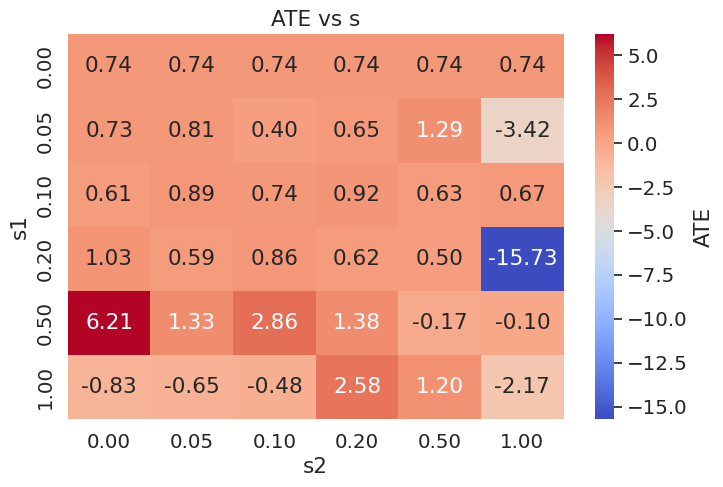

In [8]:
plt.figure(figsize=(8,5))
gb = ATE.groupby(["s1","s2"])["ate"].mean().unstack() 
sns.heatmap(gb, cmap="coolwarm", annot=True, fmt=".2f", cbar_kws={'label':'ATE'})
plt.title('ATE vs s')
plt.xlabel('s2')
plt.ylabel('s1')
plt.show()

*По тепл. карте видно, что когда хотя бы для одной из моделей шум составляет 0% (это 1й столбец U 1я строка), итоговая оценка действительно несмещена (почти везде)*

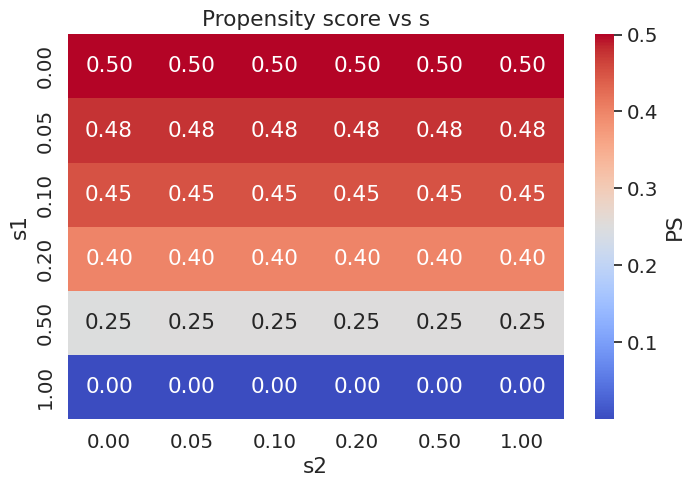

In [9]:
plt.figure(figsize=(8,5))
gb = ATE.groupby(["s1","s2"])["ps"].mean().unstack()
sns.heatmap(gb, cmap="coolwarm", annot=True, fmt=".2f", cbar_kws={'label':'PS'})  # Средний ps
plt.title('Propensity score vs s')
plt.xlabel('s2')
plt.ylabel('s1')
plt.show()

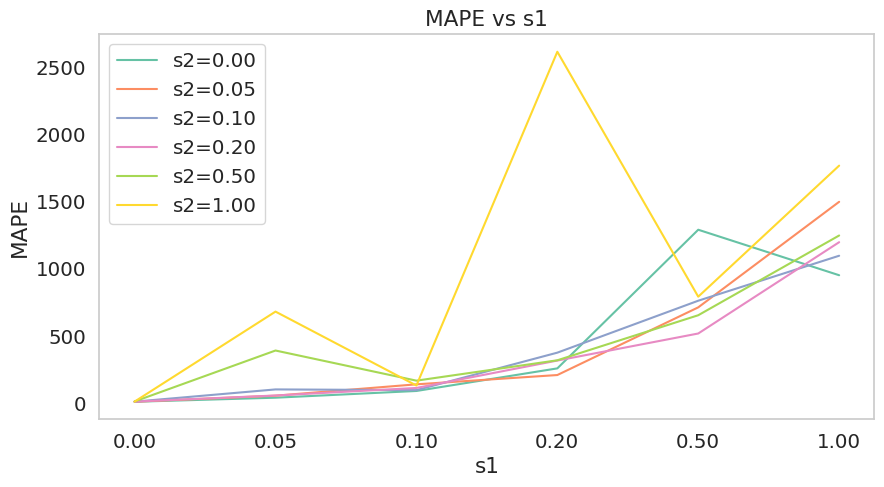

In [10]:
plt.figure(figsize=(10,5))
ATE['mape'] = (np.abs(ATE['ate'] - 0.7) / 0.7) * 100
gb = ATE.groupby(['s1','s2'])['mape'].mean().reset_index()
for s2 in [0, 0.05, 0.1, 0.2, 0.5, 1]:
    subset = gb[gb['s2'] == f'{s2:.2f}']
    plt.plot(subset['s1'], subset['mape'], label=f's2={s2:.2f}')
plt.xlabel('s1')
plt.ylabel('MAPE')
plt.title('MAPE vs s1')
plt.legend()
plt.grid()
plt.show()

*МАРЕ растет*

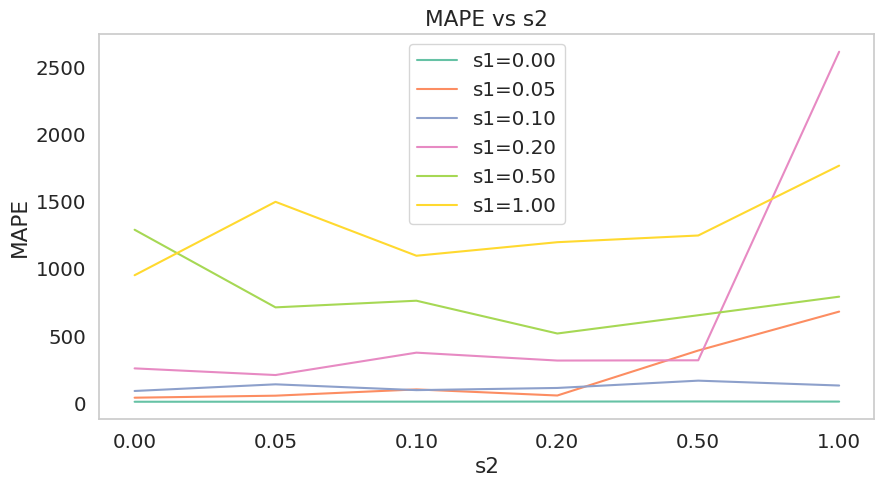

In [11]:
plt.figure(figsize=(10,5))
ATE['mape'] = (np.abs(ATE['ate'] - 0.7) / 0.7) * 100
gb = ATE.groupby(['s1','s2'])['mape'].mean().reset_index()
for s1 in [0, 0.05, 0.1, 0.2, 0.5, 1]:
    subset = gb[gb['s1'] == f'{s1:.2f}']
    plt.plot(subset['s2'], subset['mape'], label=f's1={s1:.2f}')
plt.xlabel('s2')
plt.ylabel('MAPE')
plt.title('MAPE vs s2')
plt.legend()
plt.grid()
plt.show()

*МАРЕ, кажется, снова растет*

**Выводы:** *DRE начинает ломаться, когда обе модели ошбаются*

<b><font color="#00b565" size="5">===== Конец исправлений =====</font></b>

---
### Задача 2.

Рассмотрим следующие метрики ошибки/качества моделей оценки причинно-следственного вывода, которые также оценивают доверительный интервал эффекта, тем самым позволяя проверить гипотезу об отсутствии причинно-следственного эффекта.
1. Вероятность отвержения гипотезы об отсутствии эффекта, что в зависимости от отсутствия/наличии эффекта соответствует вероятности ошибки 1 рода и мощность соответственно.
2. MAPE &mdash; математическое ожидание модуля относительного отклонения оценки эффекта от его истинного значения.
3. Вероятность покрытия доверительным интервалов параметра &mdash; вероятность того, что доверительный интервал накрывает истинное значение эффекта.
4. Длина доверительного интервала.

Каждую из этих метрик можно оценить с помощью многократного семплирования данных подобно итерациям AA-тестования. Реализуйте по шаблону функции для вычисления этих метрик, имея на входе результаты семплирований. 

*Примечание.* Для некоторых метрик могут потребоваться не все аргументы, но для универсальности сигнатуры оставляйте их всех. Так будет удобнее в дальнейшем реализовывать саму процедуру валидации, сделав цикл по всем метрикам.

In [12]:
# def metric_name(estimations, left, right, true_effect=0):
#     '''
#     estimations -- массив оценок причинно-следственного эффекта
#     left, right -- массивы для левой и правой границ доверительного интервала причинно-следственного эффекта
#     true_effect -- истинное значение причинно-следственного эффекта
#     '''
#     value = ...
#     return value

def rej_prob(estimations, left, right, true_effect=0):
    return ((true_effect < left) | (right < true_effect)).mean()
def mape(estimations, left, right, true_effect=0):
    return np.abs((true_effect-estimations)/true_effect).mean()
def ci_prob(estimations, left, right, true_effect=0):
    return ((left < estimations) & (estimations < right)).mean()
def ci_length(estimations, left, right, true_effect=0):
    return (right-left).mean()
metrics = {'rej_prob':rej_prob, 'mape':mape, 'ci_prob':ci_prob, 'ci_length':ci_length}

Сначала проведем базовую валидацию моделей на искусственных данных. Для генерации используйте функцию из ноутбука по валидации с CI, генерируя следующие варианты данных:
1. имеется только тритмент и таргет,
2. добавляются ковариаты,
3. добавляются конфаундеры.

Проведите сравнение следующих моделей:
* [данные 1-3] **Обычный t-test**, варианты применения
    * простая реализация из `scipy`
    * использование линейной регрессии из `statsmodels`
    * использование `backdoor.linear_regression` в `dowhy`, в которую передать только *тритмент и таргет*;
* [данные 2-3] **CUPED**, варианты применения
    * функции из прошлых ноутбуков
    * использование линейной регрессии из `statsmodels`
    * использование `backdoor.linear_regression` в `dowhy`, в которую передать только *тритмент, таргет и ковариаты*;
* [данные 3] **Propensity Score Weighting**, варианты применения
    * функции из прошлых ноутбуков, используя вариант с линейной регрессией *без* ковариат и конфаундеров
    * использование `backdoor.propensity_score_weighting` в `dowhy`, в которую передать *тритмент, таргет, ковариаты и конфаундеры*;
* [данные 3] **Doubly Robust Estimation**, варианты применения
    * функции из прошлых ноутбуков, используя вариант с линейной регрессией *с* ковариатами и конфаундерами
    * использование `backdoor.econml.dr.LinearDRLearner` в `dowhy`, в которую передать *тритмент, таргет, ковариаты и конфаундеры*;


Каждое значение метрики необходимо вычислять на данных с одинаковыми статистическими свойствами (связи, количество признаков, размер данных, и т.д.). Тем самым пайплайн валидации **одной** модели на **одной** структуре данных должен быть примерно следующим.

```
- Фиксация структуры данных (связи, количество признаков, размер данных, ...)
- Итерации метода Монте-Карло:
    * Генерация семпла данных, все опции фиксированы
    * Обучение модели, оценка эффекта, построение интервала
    * Сохранение результатов
- Вычисление значений метрик. Здесь мы получаем одну оценку каждой метрики для фиксированной структуры данных.
```

Все методы стоит проверять на одних тех же данных.
Во-первых, это экономит время за счет меньшего количества семплирований, а во-вторых, результаты будут обладать большей стабильностью в контексте сравнения моделей, ведь мы будем сравнивать модели на одинаковых данных. Тем самым пайплайн валидации **всех** моделей на **одной** структуре данных должен быть примерно следующим.

```
- Фиксация структуры данных (связи, количество признаков, размер данных, ...)
- Итерации метода Монте-Карло:
    * Генерация семпла данных, все опции фиксированы
    * Для каждой исследуемой модели:
        - Обучение модели, оценка эффекта, построение интервала
        - Сохранение результатов
- Для каждой исследуемой модели:
    * Вычисление значений метрик. Здесь мы получаем одну оценку каждой метрики для фиксированной структуры данных.
```

Количество итераций Монте-Карло должно быть не менее $10^3$. Размер данных возьмите равными $10^3$. Для ускорения можно использовать распараллеливание (см., например, ноутбук по doubly robust estimation). <b><u>Тестируйте свой код на малом количестве итераций.</u></b>

In [13]:
data = generate_data(effect=0.7, n_confounders=1, n_covariates=1, sample_size=1000)
id_est = CausalModel(data=data, treatment='T', outcome='y', common_causes=['W_0','X_0']).identify_effect()
models = { 
    'ttest': lambda x: CausalModel(data=x, treatment='T', outcome='y', common_causes=[]).estimate_effect(identified_estimand=id_est, method_name='backdoor.linear_regression'),
    'cuped': lambda x: CausalModel(data=x, treatment='T', outcome='y', common_causes=['X_0']).estimate_effect(identified_estimand=id_est, method_name='backdoor.linear_regression'),
    'psw': lambda x: CausalModel(data=x, treatment='T', outcome='y', common_causes=['W_0','X_0']).estimate_effect(identified_estimand=id_est, method_name='backdoor.propensity_score_weighting'),
    # С dre так и не заработало((
    # 'dre': lambda x: CausalModel(data=x, treatment='T', outcome='y', common_causes=['W_0','X_0']).estimate_effect(identified_estimand=id_est, method_name='backdoor.econml.dr.LinearDRLearner')
}
res = {k:{} for k in models.keys()}
for _ in tqdm(range(1000)):
    estims, Ls, Rs  = [], [], []
    for name,f in models.items():
        est = f(data)
        estims.append(est.value)
        ci = est.get_confidence_intervals()
        if len(ci)==1:
            ci = ci[0]
        Ls.append(ci[0])
        Rs.append(ci[1])
        for m_name,m_func in metrics.items():
            res[name][m_name] = m_func(np.array(estims), np.array(Ls), np.array(Rs), 0.7)
print(res)

100%|██████████| 1000/1000 [1:08:53<00:00,  4.13s/it]

{'ttest': {'rej_prob': 0.0, 'mape': 0.008546552639321836, 'ci_prob': 1.0, 'ci_length': 0.2427278211623476}, 'cuped': {'rej_prob': 0.0, 'mape': 0.008546552639321836, 'ci_prob': 1.0, 'ci_length': 0.2427278211623476}, 'psw': {'rej_prob': 0.0, 'mape': 0.008795672369285341, 'ci_prob': 1.0, 'ci_length': 0.303321351752531}}


Предположим, что некоторые конфаундеры ненаблюдаемы, но они существуют. То есть их нужно сгенерировать, но не передавать в модель. Возможно, проще будет воспользоваться интерфейсом через указание типов переменных.

Провалидируйте модель Propensity Score Weighting. Сравните результаты. Чем нам мешают ненаблюдаемые конфаундеры?

<b><font color="#00b565" size="5">Исправил код</font></b>

<b><font color="#00b565" size="3">Замечание:</font></b> <i>  
▫️ Сделано только начало. (-110.0)  
Баллы: 10.0 / 120.0</i>  
  
поместил комментарии вокруг новой ячейки  

In [14]:
data = generate_data(effect=0.7, n_confounders=1, n_covariates=1, sample_size=1000).drop(columns=["W_0"])  # Конфаундеры ненаблюдаемы, но они существуют
id_est = CausalModel(data=data, treatment='T', outcome='y', common_causes=['X_0']).identify_effect() #Валидируем psw с ненаблюдаемыми конфаундерами
f = lambda x: CausalModel(data=x, treatment='T', outcome='y', common_causes=['X_0']).estimate_effect(identified_estimand=id_est, method_name='backdoor.propensity_score_weighting')

res = {}
for _ in tqdm(range(1000)):
    estims, Ls, Rs = [], [], []
    est = f(data)
    estims.append(est.value)
    ci = est.get_confidence_intervals()
    if len(ci) == 1:
        ci = ci[0]
    Ls.append(ci[0])
    Rs.append(ci[1])
    for m_name, m_func in metrics.items():
        res[m_name] = m_func(np.array(estims), np.array(Ls), np.array(Rs), 0.7)
print(res)

100%|██████████| 1000/1000 [1:06:02<00:00,  3.96s/it]

{'rej_prob': 0.0, 'mape': 0.02622326314541005, 'ci_prob': 1.0, 'ci_length': 0.4529052729824984}


*МАРЕ выросла, дов. интервал расширился. Наблюдение конфаундеров улучшает работу модели*

<b><font color="#00b565" size="5">===== Конец исправлений =====</font></b>

Какие методы оказались лучше?

**Выводы:** *в этой задаче удалось сравнить 4 модели по нескольким метрикам (но у меня не заработал dre, возможно, он лучше всех)*